    exnode 5. play rock scissor paper 
     . data 확인 : 이미지확인 , data 전처리 실시(정규화)
           2) 데이터분리 : train, test 분리 
             . train(1500장) : /aiffel/rock_scissor_paper/220930_exnode_5/scissors(rock,paper)
    
    1. 절차 
        0) package loding
        1) 데이터 준비 : 조원들과 함께 가위,바위,보의 이미지를 합동으로 만들었다.
          . 이미지 : 2100장( 1명당 300장의 이미지 작성*7명 )
            ..데이터분리 : train, test 분리 
              ... train(1500장) : /aiffel/rock_scissor_paper/220930_exnode_5/scissors(rock,paper)
              ... test(600장)   : /aiffel/rock_scissor_paper/220930_exnode_5/test/scissors(rock,paper)   
        2) 데이터 사이즈 변경 : train , test
        3) 모델설계하기 : Conv2D, MaxPooling2D, Flatten, Dense
          . Conv2D
          . MaxPooling2D
          . Flatten
          . Dense
        4) 모델 학습 
          . 네트워크 입력형태 만들기
          . 학습시키기
        5) test data 준비
        6) 성능확인 
          . 예측한 값과 실제 값 확인
          . 데이터로 확인
          . model이 추론해 낸 이미지와 실제 라벨의 값이 다른 경우
    2. 결론 & 배운점

In [85]:
#0) package loding
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

In [86]:
#2-1 데이터 사이즈 변경 : 가위 (이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    #print(images.shape)
    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!


In [87]:
#2-2 데이터 사이즈 변경 : 바위 (이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
바위 이미지 resize 완료!


In [88]:
#2-3 데이터 사이즈 변경 : 보 ( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

500  images to be resized.
500  images resized.
보 이미지 resize 완료!


In [89]:
#2-4) 데이터 분리 
def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5"
(x_train, y_train)=load_data(image_dir_path)
#supple
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1000 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


라벨:  1


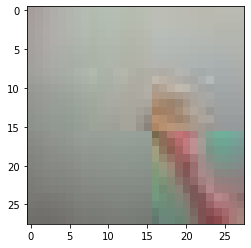

In [90]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [91]:
#3) 모델설계하기
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [92]:
#4-1) 모델 학습 : 학습시키기
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
#model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)


model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/30
47/47 [==============================] - 0s 3ms/step - loss: 0.8166 - accuracy: 0.6107
Epoch 2/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.6753
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.6740
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.6947
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.7833
Epoch 6/30
47/47 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8367
Epoch 7/30
47/47 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8653
Epoch 8/30
47/47 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8733
Epoch 9/30
47/47 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.8980
Epoch 10/30
47/47 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.8860
Epoch 11/30
47/47 [

In [93]:
#5) 성능확인 .. test data 준비 .. 가위 ( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    #print(images.shape)
    # 파일마다 모두 112 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [94]:
#5) 성능확인 .. test data 준비 .. 바위 ( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 112,112 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [95]:
#5) 성능확인 .. test data 준비 .. 보( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 112,112사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [96]:
#5) 성능확인 .. test data 통합
def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("평가데이터(x-test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [97]:
#6) 성능확인
#6-1) test data로 점수
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


19/19 - 0s - loss: 4.5034 - accuracy: 0.5083
test_loss: 4.503433704376221 
test_accuracy: 0.5083333253860474


In [98]:
#6) 성능확인
#6-2) 추론한 값들 확인 
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [6.5638579e-07 9.6731967e-01 3.2679569e-02]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


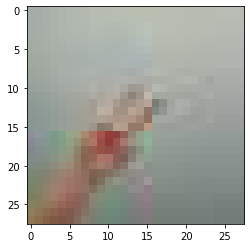

In [99]:
#6) 성능확인
#6-3) - 데이타로 확인 
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [100]:
#6) 성능확인
#6-4)  model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우
import random

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


예측확률분포: [8.6009086e-06 2.0482813e-01 7.9516321e-01]
라벨: 1, 예측결과: 2


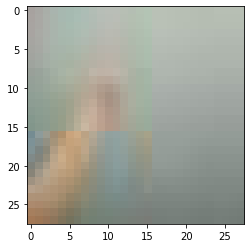

예측확률분포: [4.6431801e-06 6.9569546e-01 3.0429989e-01]
라벨: 0, 예측결과: 1


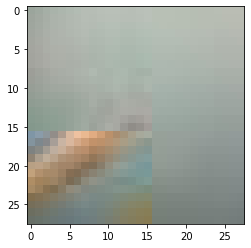

예측확률분포: [6.7979272e-08 9.9459743e-01 5.4024290e-03]
라벨: 2, 예측결과: 1


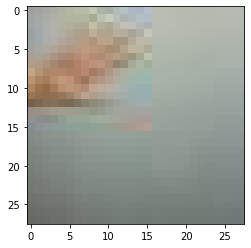

예측확률분포: [1.5335705e-05 6.9730955e-01 3.0267519e-01]
라벨: 0, 예측결과: 1


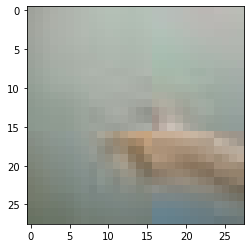

예측확률분포: [2.9992101e-05 1.8980776e-01 8.1016225e-01]
라벨: 0, 예측결과: 2


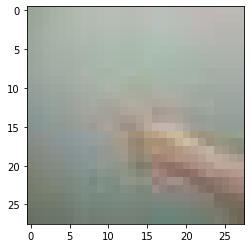

test_accuracy: 0.5083333253860474
After Reshape - x_test_norm shape: (600, 28, 28, 3)


In [101]:
#6) 성능확인
#6-5)  model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()
print(f"test_accuracy: {test_accuracy}")
print(f"After Reshape - x_test_norm shape: {x_test_norm.shape}")
